In [1]:
import pandas as pd
import numpy as np
import sqlite3
import dowhy
import causallearn
import matplotlib.pyplot as plt
import networkx as nx

from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

from IPython.display import Image

from data import chembl_physicochemical_assays
from display_utils import view_pydot

In [2]:
preprocessed = chembl_physicochemical_assays(verbose=True)

Began with 181535 rows, for 17943 assays and 25734 molecules.

Filtered to 38808 rows, for 22 assays and 3709 moleucles.

description
Partition coefficient (logP)                                                                                                                                                         5843
ASTRAZENECA: Octan-1-ol/water (pH7.4) distribution coefficent measured  by a shake flask method described in J. Biomol. Screen. 2011, 16, 348-355. Experimental range -1.5 to 4.5    4200
Dissociation constant, pKa of the compound                                                                                                                                           3396
Lipophilicity, log P of the compound                                                                                                                                                 2850
Lipophilicity, log D of the compound at pH 7.4                                                                            

/Users/patrickrowe/Documents/Code/chembl-causal/data.py:104: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pivoted = pivoted.groupby(level=0, axis=1).mean()


In [3]:
cg, edges = fci(preprocessed.to_numpy(), node_names=preprocessed.columns.to_list())

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pydot_graph = GraphUtils.to_pydot(cg)

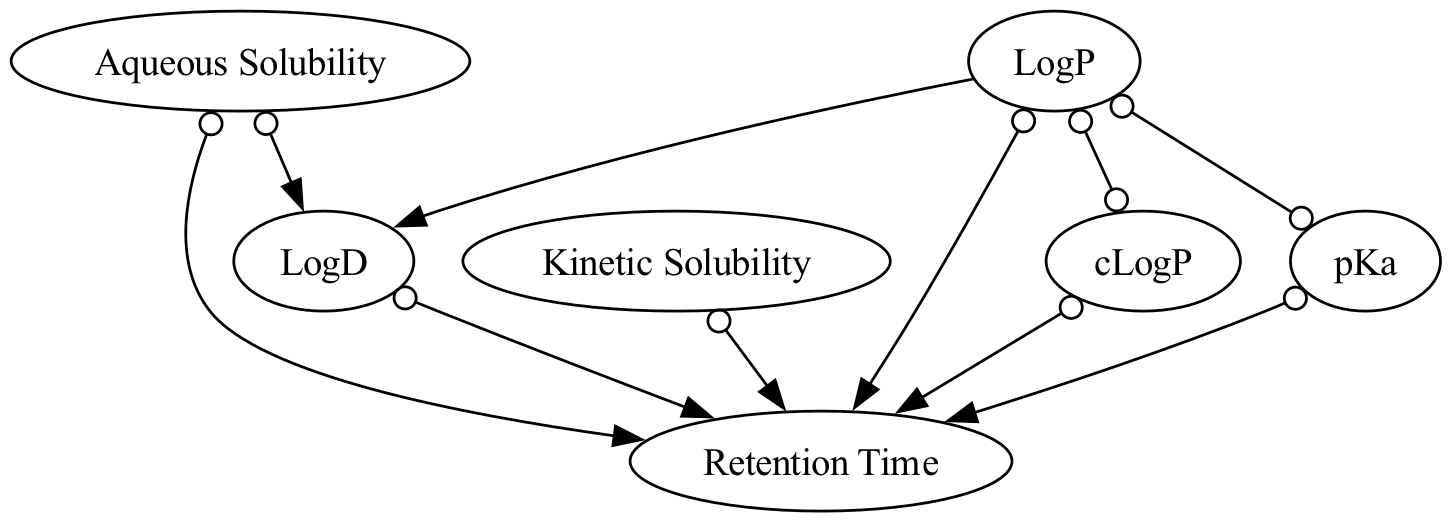

In [5]:
view_pydot(pydot_graph=pydot_graph)